<center>
    
# Runge Kutta 5

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

## Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def runge_kutta_5(f, h, x0, y0, xmax):
    
    N = int((xmax-x0)//h) + 1
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0
    y[0] = y0
    
    for ii in range(N-1):
        
        k1 = f(x[ii], y[ii])
        k2 = f(x[ii] + h/4, y[ii] + k1*h/4)
        k3 = f(x[ii] + h/4, y[ii] + k1*h/8 + k2*h/8)
        k4 = f(x[ii] + h/2, y[ii] + k2*h/2 + k3*h)
        k5 = f(x[ii]+3*h/4, y[ii] + (3*k1 + 9*k4)*h/16)
        k6 = f(x[ii] + h, y[ii] + (-3*k1 + 2*k2 + 12*k3 - 12*k4 + 8*k5)*h/7)
        
        x[ii + 1] = x[ii] + h
        y[ii + 1] = y[ii] + h*(7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)/90
        
    
    return x, y

## Test

In [3]:
def func_f(x, y): return (x - 2*y)

h, x0, y0, xmax = 0.01, 0, 1, 5

def analitic_sol(x): return (2*x - 1 + 5*np.exp(-2*x))/4

numeric_sol = runge_kutta_5(func_f, h, x0, y0, xmax)
    

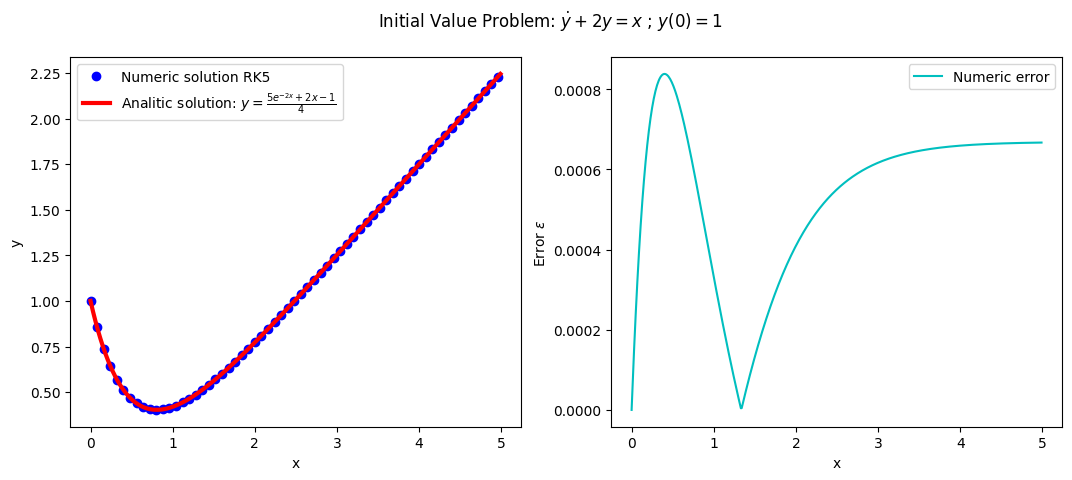

In [4]:
fig = plt.figure(figsize=(12.8, 4.8))
fig.suptitle(r"Initial Value Problem: $\dot{y} + 2y = x$ ; $y(0) = 1$")

ax1 = fig.add_subplot(1,2,1)

ax1.plot(numeric_sol[0][::8], analitic_sol(numeric_sol[0][::8]), "bo", label = "Numeric solution RK5")
ax1.plot(numeric_sol[0], numeric_sol[1], "r-", linewidth = 3, label = r"Analitic solution: $y = \frac{5e^{-2x}+2x-1}{4}$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(numeric_sol[0], np.absolute(analitic_sol(numeric_sol[0])-numeric_sol[1]), "c-", label = "Numeric error")
ax2.set_xlabel("x")
ax2.set_ylabel(r"Error $\varepsilon$")
ax2.legend()

plt.savefig("./test.png")

## Exerecise

In [5]:
#Solving

def func_g(x, y, alpha): return x**2 - 2*np.power(y, alpha) 
alphas = np.arange(0.2, 1, 0.2)

h, x0, y0, xmax = 0.01, 0, 1, 5
solutions = []

for ii in range(alphas.size):
    solutions.append(runge_kutta_5(lambda x,y: func_g(x, y, alphas[ii]), h, x0, y0, xmax))

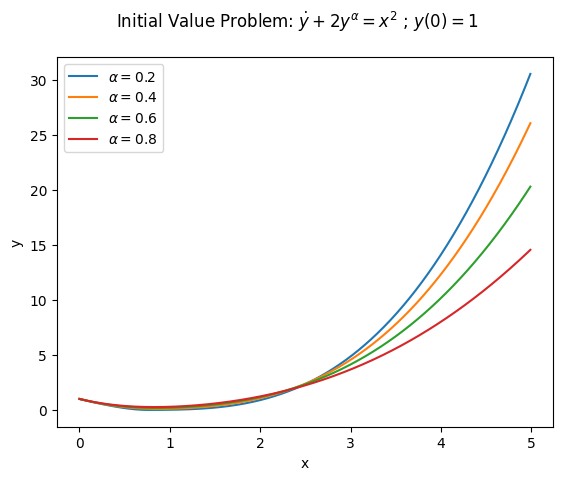

In [6]:
#Ploting

fig = plt.figure()
fig.suptitle(r"Initial Value Problem: $\dot{y} + 2y^{\alpha} = x^2$ ; $y(0) = 1$")

ax = fig.add_subplot(1,1,1)

for ii in range(alphas.size):
    ax.plot(solutions[ii][0], solutions[ii][1], label = r"$\alpha = %.1f$"%(alphas[ii]))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.savefig("./excercise.png")